In [1]:
import numpy as np
import pandas as pd
import collections
from sklearn.cluster import KMeans

df = pd.read_csv("highDdata.csv")
N = df.shape[0]
print("dataset size", N)
df = df[0:N+1]
data = np.array(df)
data = data[:, 6:data.shape[1]]
# print(data)
 
num_clusters = 2
km_cluster = KMeans(n_clusters=num_clusters, max_iter=300, n_init=40, \
                    init='k-means++',n_jobs=-1)

#返回各自文本的所被分配到的类索引
result = km_cluster.fit_predict(data)
show = np.column_stack((np.array(df)[:,1], result))
show = pd.DataFrame(show, columns=["name", "label"])
print(show)

def count_cluster(arr):
    return np.sum(arr)
count_c1 = count_cluster(result)
count_c0 = len(result) - count_c1
print("count of cluter0", count_c0)
print("count of cluter1", count_c1)

result = pd.DataFrame(result, columns=["label"])

result = pd.concat([df, result], axis=1)

print(result)
result.to_csv("highDdataLabeled.csv", index = False)
# res = km_cluster.predict(data)
# print(res)
# for i in range(N):
#     print(df.iat[i,1], result[i])







dataset size 10000
               name label
0     United States     0
1     United States     0
2     United States     0
3     United States     0
4     United States     0
...             ...   ...
9995  United States     0
9996  United States     0
9997  United States     0
9998  United States     0
9999  United States     0

[10000 rows x 2 columns]
count of cluter0 8674
count of cluter1 1326
                                           product_name   countries_en  \
0                        Banana Chips Sweetened (Whole)  United States   
1                                               Peanuts  United States   
2                                Organic Salted Nut Mix  United States   
3                                       Organic Polenta  United States   
4                     Breadshop Honey Gone Nuts Granola  United States   
...                                                 ...            ...   
9995  Iced Tea & Lemonade, Half & Half Flavor With O...  United States   
9996   

PermissionError: [Errno 13] Permission denied: 'highDdataLabeled.csv'

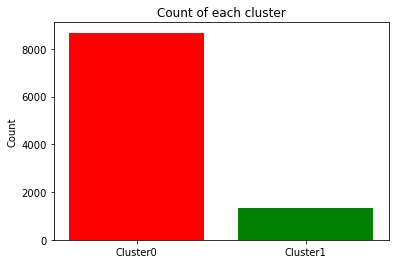

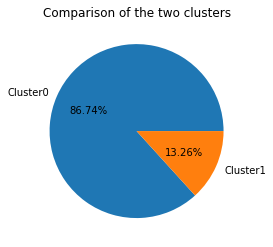

In [3]:
import matplotlib.pyplot as plt
 
name_list = ['Cluster0','Cluster1']
num_list = [count_c0, count_c1]
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.ylabel("Count")
plt.title("Count of each cluster")
plt.show()


plt.pie(num_list,labels=name_list,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("Comparison of the two clusters")
plt.show()